# TTC Analysis of Ridership 

## cleaning up dataset

In [1]:
## import statement 

import pandas as pd
import numpy as np

In [2]:
## read file, remove NaN values
df = pd.read_excel('ttc-ridership-analysis.xlsx')
records_before = df.size
missing_values = df.isna().sum().sum()

In [3]:
df = df.iloc[3:,1:]
df.columns = df.iloc[0]

In [4]:
# remove padding before and after string value
new_cols = []
for date in df.columns:
    new_cols.append(str(date).replace(' ', ''))
    
add_cols = []
for i in range(len(new_cols)):
    add_cols.append(new_cols[i].replace('.0',''))
# clean headers
df.columns = add_cols

In [5]:
df['FARE_MEDIA'] = df['FAREMEDIA'].str.strip()
df.drop(labels =['FAREMEDIA'], axis=1, inplace=True)

In [7]:
## sub-divide df into who, where, when 
# apply meaninful index

who_ttc = df.iloc[3:43].set_index('FARE_MEDIA', drop= True)
where_ttc = df.iloc[43:53].set_index('FARE_MEDIA', drop= True)
when_ttc = df.iloc[53:56].set_index('FARE_MEDIA', drop= True)

In [93]:
who_ttc.head(3)

,2018,2017,2016,2015*,2014,2013,2012,2011,2010,2009,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
FARE_MEDIA,,,,,,,,,,,,,,,,,,,,,
TICKETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1298.0,8807.0,...,62700.0,57710.0,53655.0,35788.0,38369,37401.0,39514.0,38944.0,42052.0,48793.0
TWO-FARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13265.0,12894.0,11201.0,17927.0,22313,27025.0,18837.0,8976.0,7347.0,NaN
PRESTO - SINGLE RIDE,116888.0,67829.0,27397.0,13323,9862.0,8194.0,4399.0,1139.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
where_ttc.head(3)

,2018,2017,2016,2015*,2014,2013,2012,2011,2010,2009,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
FARE_MEDIA,,,,,,,,,,,,,,,,,,,,,
BUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUS,264538.0,261113.0,252899.0,238943,245292.0,239968.0,234582.0,223269.0,219855.0,218545.0,...,191020.0,189060.0,192495.0,189150.0,202681,198078.0,208057.0,203400.0,188912.0,192690.0
SUB-TOTAL,264538.0,261113.0,252899.0,238943,245292.0,239968.0,234582.0,223269.0,219855.0,218545.0,...,191020.0,189060.0,192495.0,189150.0,202681,198078.0,208057.0,203400.0,188912.0,192690.0


In [95]:
when_ttc.head(3)

,2018,2017,2016,2015*,2014,2013,2012,2011,2010,2009,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
FARE_MEDIA,,,,,,,,,,,,,,,,,,,,,
WEEKDAY,417245.0,424155.0,424117.0,423808,423269.0,416297.0,406913.0,395578.0,379810.0,374908.0,...,319087.0,324529.0,334515.0,350714.0,379987,374024.0,385093.0,382917.0,369295.0,358947.0
WEEKEND/HOLIDAY,104159.0,109061.0,113962.0,110197,111546.0,108897.0,107094.0,104641.0,97547.0,96325.0,...,69165.0,68956.0,69736.0,73453.0,79247,76702.0,78382.0,73967.0,71717.0,73213.0
SYSTEM TOTAL,521404.0,533216.0,538079.0,534005,534815.0,525194.0,514007.0,500219.0,477357.0,471233.0,...,388252.0,393485.0,404251.0,424167.0,459234,450726.0,463475.0,456884.0,441012.0,432160.0


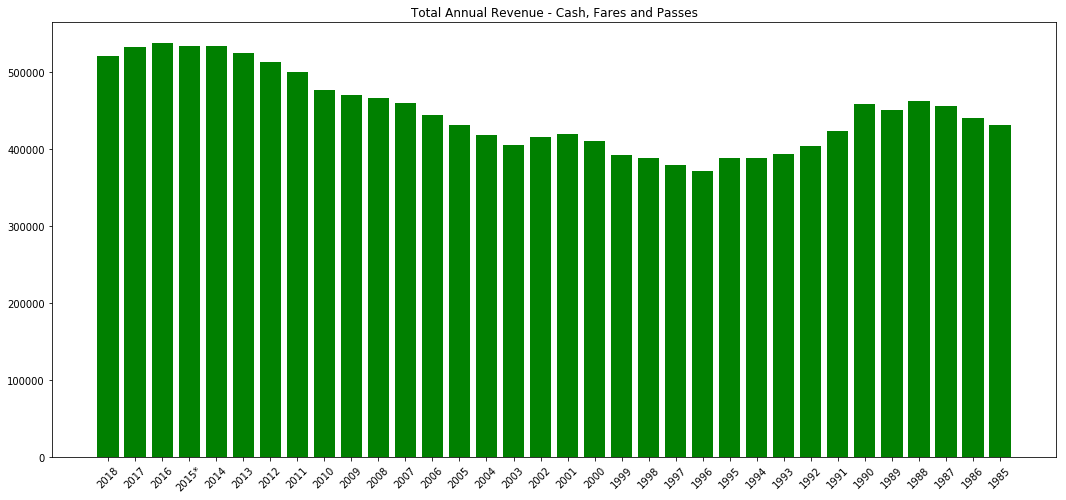

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

x = who_ttc.loc['SYSTEM TOTAL'].index
y = who_ttc.loc['SYSTEM TOTAL'].values

fig = plt.figure(figsize=(18,8))
plt.tick_params(axis='x', rotation=45)
plt.bar(x=x, height=y, color=['green'])
plt.title('Total Annual Revenue - Cash, Fares and Passes')
plt.show()